In [1]:
import sys
sys.path.append('..')
from utils import ImageAnalyzer
import os
import pandas as pd
import seaborn as sn
import torch
import pytorch_lightning
import torchmetrics
import torchvision
import IPython

ModuleNotFoundError: No module named 'PyTorch'

In [3]:
class MnistModel(ImageAnalyzer):
    def __init__(self, img_width,img_height,channels,
                n_of_classes,data_dir=os.environ.get("PATH_DATASETS", "."),batch_size=64):

        super(MnistModel,self).__init__(img_width=img_width,
                                    img_height=img_height,
                                    channels=channels,
                                    n_of_classes=n_of_classes)
        self.data_dir = data_dir
        self.batch_size = batch_size
    
        self.transform = torchvision.transforms.Compose(
            [
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0,), (1,)),
            ])

        
    def prepare_data(self):
        ''' Used to download data'''
        torchvision.datasets.MNIST(self.data_dir, train=True, download=True)
        torchvision.datasets.MNIST(self.data_dir, train=False, download=True)

    def setup(self, stage=None):
        ''' Used to assign train/val datasets for use in dataloaders'''
        if stage == "fit" or stage is None:
            mnist_full = torchvision.datasets.MNIST(self.data_dir, train=True, transform=self.transform)
            self.mnist_train, self.mnist_val = torch.utils.data.random_split(mnist_full, [55000, 5000])

        if stage == "test" or stage is None:
            self.mnist_test = torchvision.datasets.MNIST(self.data_dir, train=False, transform=self.transform)

    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.mnist_train, batch_size=self.batch_size, num_workers = 4)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(self.mnist_val, batch_size=self.batch_size, num_workers = 4)

    def test_dataloader(self):
        return torch.utils.data.DataLoader(self.mnist_test, batch_size=self.batch_size, num_workers = 4)

In [9]:
mnist_model = MnistModel(img_width=28,img_height=28,channels=1,n_of_classes=10)


# Initialize a trainer
trainer = pytorch_lightning.Trainer(
    callbacks=pytorch_lightning.callbacks.RichModelSummary(-1),
    max_epochs=5,
    logger = pytorch_lightning.loggers.CSVLogger(save_dir="logs/")
)

# Train the model ⚡
trainer.fit(mnist_model)

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


┏━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Name     ┃ Type               ┃ Params ┃
┡━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0  │ accuracy │ MulticlassAccuracy │      0 │
│ 1  │ model    │ Sequential         │  165 K │
│ 2  │ model.0  │ Conv2d             │     20 │
│ 3  │ model.1  │ ReLU               │      0 │
│ 4  │ model.2  │ Conv2d             │     76 │
│ 5  │ model.3  │ ReLU               │      0 │
│ 6  │ model.4  │ MaxPool2d          │      0 │
│ 7  │ model.5  │ Conv2d             │    296 │
│ 8  │ model.6  │ ReLU               │      0 │
│ 9  │ model.7  │ Conv2d             │  1.2 K │
│ 10 │ model.8  │ ReLU               │      0 │
│ 11 │ model.9  │ MaxPool2d          │      0 │
│ 12 │ model.10 │ Flatten            │      0 │
│ 13 │ model.11 │ Linear             │  153 K │
│ 14 │ model.12 │ ReLU               │      0 │
│ 15 │ model.13 │ Linear             │  9.7 K │
│ 16 │ model.14 │ ReLU               │      0 │
│ 17 │ model.15 │ Linear             │    600 │
│ 18 │ model.16 │ ReLU               │      0 │
│ 19 │ model.17 │ Linear             │    130 │
└────┴──────────┴────────────────────┴────────┘

Trainable params: 165 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 165 K                                                                                                
Total estimated model params size (MB): 0

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

c:\Users\vicen\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [8]:
trainer.test(ckpt_path='best')

Restoring states from the checkpoint path at logs/lightning_logs\version_54\checkpoints\epoch=4-step=4300.ckpt
Loaded model weights from checkpoint at logs/lightning_logs\version_54\checkpoints\epoch=4-step=4300.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9666000008583069     │
│         test_loss         │    0.11719289422035217    │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.9666000008583069, 'test_loss': 0.11719289422035217}]

,val_acc,val_loss,test_acc,test_loss
epoch,,,,
0,0.8262,0.599842,NaN,NaN
1,0.9142,0.308009,NaN,NaN
2,0.9380,0.222894,NaN,NaN
3,0.9498,0.182726,NaN,NaN
4,0.9560,0.157374,NaN,NaN


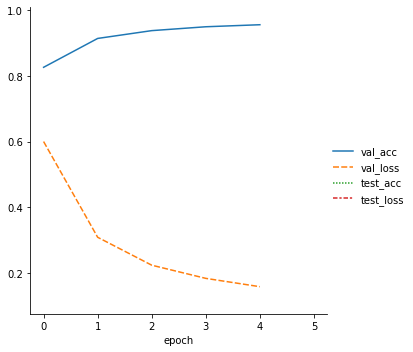

In [7]:
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
del metrics["step"]
metrics.set_index("epoch", inplace=True)
IPython.display.display(metrics.dropna(axis=1, how="all").head())
sn.relplot(data=metrics, kind="line")